Convolutional Neural Network (CNN) on CIFAR-10

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Load Fashion-MNIST Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1) Test shape: (10000, 28, 28, 1)


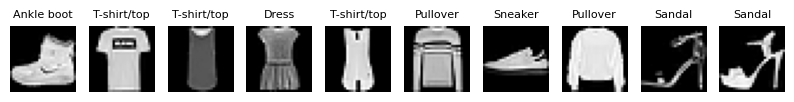

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

# Class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Show sample images
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]], fontsize=8)
    plt.axis("off")
plt.show()

Build CNN Model

In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile

In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Train

In [7]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
)


Epoch 1/10
422/422 - 44s - 104ms/step - accuracy: 0.7472 - loss: 0.6867 - val_accuracy: 0.8443 - val_loss: 0.4140
Epoch 2/10
422/422 - 42s - 100ms/step - accuracy: 0.8488 - loss: 0.4219 - val_accuracy: 0.8712 - val_loss: 0.3500
Epoch 3/10
422/422 - 82s - 193ms/step - accuracy: 0.8704 - loss: 0.3588 - val_accuracy: 0.8817 - val_loss: 0.3068
Epoch 4/10
422/422 - 82s - 195ms/step - accuracy: 0.8856 - loss: 0.3195 - val_accuracy: 0.8905 - val_loss: 0.2926
Epoch 5/10
422/422 - 83s - 197ms/step - accuracy: 0.8933 - loss: 0.2968 - val_accuracy: 0.8967 - val_loss: 0.2738
Epoch 6/10
422/422 - 42s - 100ms/step - accuracy: 0.9007 - loss: 0.2728 - val_accuracy: 0.8962 - val_loss: 0.2701
Epoch 7/10
422/422 - 83s - 197ms/step - accuracy: 0.9062 - loss: 0.2594 - val_accuracy: 0.9057 - val_loss: 0.2543
Epoch 8/10
422/422 - 42s - 99ms/step - accuracy: 0.9112 - loss: 0.2425 - val_accuracy: 0.9052 - val_loss: 0.2580
Epoch 9/10
422/422 - 42s - 99ms/step - accuracy: 0.9172 - loss: 0.2287 - val_accuracy: 0.

Evaluation

Test Accuracy: 0.9066, Test Loss: 0.2612


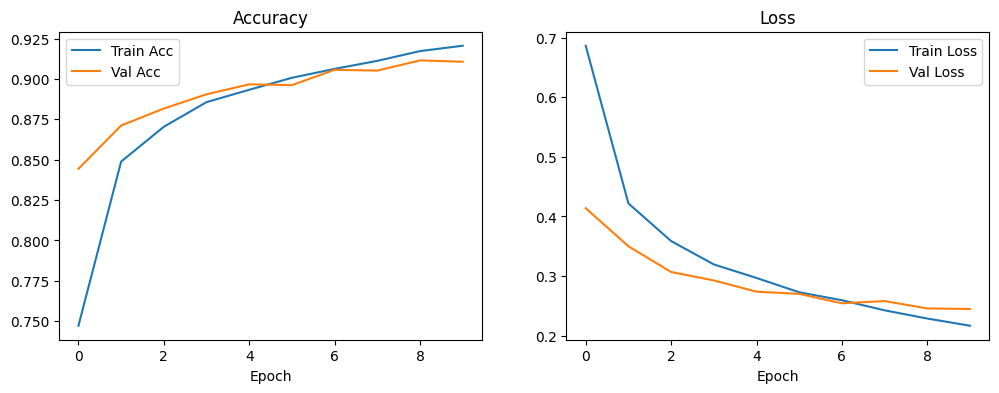

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy"); plt.xlabel("Epoch")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss"); plt.xlabel("Epoch")
plt.show()

Confusion Matrix and Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


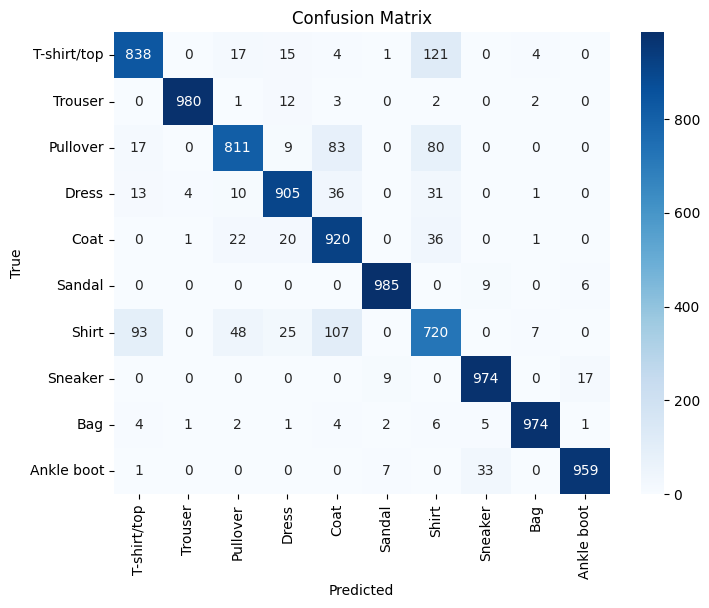

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.81      0.85      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.80      0.92      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.72      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))